In [1]:
import numpy as np
import pandas as pd

In [3]:
df_10k = pd.read_csv('./bag_of_words_full.csv', index_col=0)
df_10k.head()

,mention,watch,episode,right,exactly,happen,thing,scene,violence,set,word,pull,drug,sex,classic,use,state,focus,city,face,high,home,italian,death,far,away,main,appeal,fact,forget,pretty,picture,audience,romance,mess,develop,taste,level,sell,kill,...,crew,history,jane,copy,realistic,chase,location,choice,footage,blue,badly,cat,sci,fi,sexual,escape,road,scream,attention,t,step,society,recently,adaptation,powerful,party,park,portrayal,science,search,basic,vampire,color,maker,channel,culture,dramatic,intelligent,scott,sentiment_target
0,1,3,2,2,1,1,1,1,4,1,2,1,1,1,1,1,1,1,2,1,2,1,1,1,1,2,1,1,1,3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,positive
1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,positive
2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,positive
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative
4,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,positive


In [4]:
df_10k.describe()

,mention,watch,episode,right,exactly,happen,thing,scene,violence,set,word,pull,drug,sex,classic,use,state,focus,city,face,high,home,italian,death,far,away,main,appeal,fact,forget,pretty,picture,audience,romance,mess,develop,taste,level,sell,kill,...,answer,crew,history,jane,copy,realistic,chase,location,choice,footage,blue,badly,cat,sci,fi,sexual,escape,road,scream,attention,t,step,society,recently,adaptation,powerful,party,park,portrayal,science,search,basic,vampire,color,maker,channel,culture,dramatic,intelligent,scott
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.00000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.060760,0.554300,0.098740,0.137980,0.039280,0.141620,0.329960,0.428340,0.042420,0.136560,0.074120,0.037300,0.03626,0.069540,0.081340,0.092460,0.041860,0.036640,0.050500,0.090160,0.100920,0.076440,0.02406,0.086200,0.120800,0.11036,0.092260,0.022880,0.147020,0.053860,0.145560,0.076460,0.104660,0.02976,0.029540,0.032040,0.021440,0.048020,0.022720,0.135920,...,0.024660,0.02786,0.052060,0.02104,0.031980,0.030300,0.031940,0.026220,0.02768,0.027040,0.023900,0.025620,0.024640,0.028160,0.028320,0.026820,0.0346,0.020260,0.02506,0.036660,0.021700,0.022380,0.028440,0.022920,0.020180,0.024680,0.028200,0.02028,0.023380,0.021760,0.021700,0.020540,0.028900,0.023460,0.02544,0.02366,0.022180,0.025200,0.020640,0.021640
std,0.274426,0.910773,0.563877,0.422167,0.210945,0.441234,0.699611,0.923299,0.255933,0.422889,0.304939,0.208013,0.30415,0.381297,0.323737,0.341341,0.241555,0.217574,0.304026,0.348014,0.375044,0.327168,0.22619,0.386694,0.388292,0.36357,0.351099,0.164673,0.440374,0.248275,0.456307,0.336179,0.394245,0.20336,0.183815,0.195075,0.159565,0.252973,0.172408,0.508341,...,0.193009,0.21458,0.271645,0.31591,0.209089,0.196119,0.230653,0.175651,0.18065,0.221517,0.205255,0.180012,0.241649,0.226292,0.226537,0.202735,0.2220,0.169027,0.19275,0.201288,0.203543,0.182647,0.203941,0.155162,0.178699,0.176385,0.213648,0.20127,0.166715,0.196894,0.161461,0.154527,0.358423,0.186414,0.18120,0.18028,0.184198,0.173913,0.154449,0.236501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

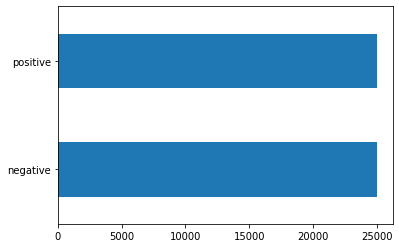

In [5]:
df_10k.sentiment_target.value_counts().plot(kind = 'barh')

In [6]:
n = 5000
df_positive = df_10k[df_10k['sentiment_target'] == 'positive'].sample(n=n)
df_negative = df_10k[df_10k['sentiment_target'] == 'negative'].sample(n=n)

df_sample_test = df_positive.append(df_negative)
df_sample_test.describe()

,mention,watch,episode,right,exactly,happen,thing,scene,violence,set,word,pull,drug,sex,classic,use,state,focus,city,face,high,home,italian,death,far,away,main,appeal,fact,forget,pretty,picture,audience,romance,mess,develop,taste,level,sell,kill,...,answer,crew,history,jane,copy,realistic,chase,location,choice,footage,blue,badly,cat,sci,fi,sexual,escape,road,scream,attention,t,step,society,recently,adaptation,powerful,party,park,portrayal,science,search,basic,vampire,color,maker,channel,culture,dramatic,intelligent,scott
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.063700,0.545100,0.10210,0.134200,0.042100,0.135800,0.327300,0.423200,0.043900,0.136700,0.072300,0.038200,0.031200,0.070600,0.07800,0.087400,0.046600,0.035600,0.048600,0.094500,0.103800,0.075200,0.024000,0.087300,0.120700,0.106700,0.093900,0.022100,0.145400,0.051300,0.141700,0.075800,0.10560,0.028600,0.029400,0.02870,0.019300,0.046000,0.02330,0.131200,...,0.029300,0.028400,0.055600,0.022200,0.033900,0.030300,0.033400,0.024600,0.028100,0.027600,0.023100,0.025900,0.026800,0.026500,0.02700,0.028100,0.035700,0.023900,0.024200,0.033000,0.02290,0.019600,0.026500,0.025000,0.021200,0.027400,0.02700,0.01900,0.024200,0.0218,0.022500,0.020100,0.024800,0.023200,0.024800,0.021800,0.023500,0.024200,0.021400,0.020800
std,0.271016,0.898914,0.56825,0.409643,0.216176,0.438152,0.700588,0.911913,0.253731,0.426417,0.292372,0.209631,0.237133,0.391958,0.31165,0.323993,0.287466,0.212455,0.285738,0.353528,0.376882,0.331294,0.224118,0.399368,0.392361,0.355988,0.374562,0.167971,0.436209,0.238483,0.451931,0.333565,0.39021,0.203436,0.179273,0.17686,0.141879,0.262851,0.17193,0.492352,...,0.242585,0.200991,0.285511,0.388744,0.217153,0.197954,0.272565,0.169699,0.180869,0.217814,0.196393,0.182298,0.281229,0.214482,0.21743,0.209081,0.220523,0.184749,0.200046,0.187922,0.20342,0.151717,0.191315,0.162412,0.183177,0.186689,0.20267,0.18773,0.170931,0.1906,0.164306,0.149326,0.328323,0.182935,0.176034,0.179243,0.193265,0.168574,0.157938,0.249346
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

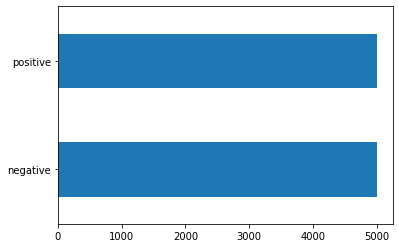

In [7]:
df_sample_test.sentiment_target.value_counts().plot(kind = 'barh')

In [ ]:
#df_sample_test.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df_sample_test.head()

,mention,watch,episode,right,exactly,happen,thing,scene,violence,set,word,pull,drug,sex,classic,use,state,focus,city,face,high,home,italian,death,far,away,main,appeal,fact,forget,pretty,picture,audience,romance,mess,develop,taste,level,sell,kill,...,crew,history,jane,copy,realistic,chase,location,choice,footage,blue,badly,cat,sci,fi,sexual,escape,road,scream,attention,t,step,society,recently,adaptation,powerful,party,park,portrayal,science,search,basic,vampire,color,maker,channel,culture,dramatic,intelligent,scott,sentiment_target
42858,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,positive
47390,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,positive
44157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,positive
45190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,positive
48364,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,positive


In [9]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

y = oe.fit_transform(df_sample_test.sentiment_target.values.reshape(-1, 1))
y

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [10]:
X = df_sample_test.drop('sentiment_target', axis=1)
X

,mention,watch,episode,right,exactly,happen,thing,scene,violence,set,word,pull,drug,sex,classic,use,state,focus,city,face,high,home,italian,death,far,away,main,appeal,fact,forget,pretty,picture,audience,romance,mess,develop,taste,level,sell,kill,...,answer,crew,history,jane,copy,realistic,chase,location,choice,footage,blue,badly,cat,sci,fi,sexual,escape,road,scream,attention,t,step,society,recently,adaptation,powerful,party,park,portrayal,science,search,basic,vampire,color,maker,channel,culture,dramatic,intelligent,scott
42858,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0
47390,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48364,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28408,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36670,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

,mention,watch,episode,right,exactly,happen,thing,scene,violence,set,...,search,basic,vampire,color,maker,channel,culture,dramatic,intelligent,scott
1519,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
11326,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5852,0,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20817,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36667,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12232,0,0,2,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7841,0,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
21096,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# DAQUI PRA FRENTE É SÓ UM TESTE
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [13]:
model = GridSearchCV(
    XGBClassifier(n_estimators=50),
    param_grid={
        'max_depth': [None, 4, 8],
        'scale_pos_weight': [1] # neg / pos
    },
    scoring='f1',
    cv=StratifiedKFold(5),
    n_jobs=-1
)

model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=50, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [None, 4, 8], 'scale_pos_weight': [1]},
             pre_dispatch='2*

In [14]:
model.best_params_

{'max_depth': 8, 'scale_pos_weight': 1}

In [15]:
modelo = XGBClassifier(max_depth=8, scale_pos_weight=1)
modelo.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [16]:
predicted_final = model.predict(X_test)
print(classification_report(y_test, predicted_final))

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80       988
         1.0       0.80      0.85      0.82      1012

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



In [32]:
# ISTO AQUI PODERIA VIR UM ARQUIVO AUX OU ALGO ASSIM

# uptade de versão se necessário
#!pip install -U spacy
#!python -m spacy info

# stop_words em inglês
from spacy.lang.en.stop_words import STOP_WORDS

from io import StringIO
from html.parser import HTMLParser

import re

import spacy

# Carrega o modelo spacy em ingles e portugues
#!python -m spacy download en_core_web_sm
#!python -m spacy download pt_core_news_sm

nlp = spacy.load("en_core_web_sm")

# método para espaçar tags html, evitando juntar palavras pelo fato de ter tags grudadas em duas palavras
# https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
def space_tags(text):
    # adiciona o espaço
    spaced_text = re.sub('([.,!?()])', r' \1 ', text)
    # remove os espaços extras
    return re.sub('\s{2,}', ' ', spaced_text)

# Método para lidar com as tags HTML que podem aparecer 
# Ele foi tirado daqui: https://stackoverflow.com/questions/753052/strip-html-from-strings-in-python
class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.text = StringIO()
    def handle_data(self, d):
        self.text.write(d)
    def get_data(self):
        return self.text.getvalue()

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

# função pra remover caracteres especiais e espaço
# A ideia é ver se dentro do lemma ainda tem palavras, senão descarta
# Números também não são interessantes num primeiro momento, então eles tmb serão desconsiderados
# https://datascience.stackexchange.com/questions/39960/remove-special-character-in-a-list-or-string
def clean_special_chars(text):
    return re.sub(r'[^a-zA-Z_]+', '', text)

# Função que cria a lista de lemmas
# feita desta forma para facilitar o reaproveitamento, seguindo a suguestão do Recigio
def create_lemmas_list(text):
    # limpeza inicial do texto
    # colcoar em caixa baixa
    clean_text = text.lower()

    # remover tags depois de adicionar espaços entre elas, desta forma evitamos
    # certas questões quanto a remover tags, mas elas estarem grudadas no texto 
    # e colarem palavras
    clean_text = strip_tags(space_tags(clean_text))

    #analisa texto
    doc = nlp(clean_text)
    
    #exporta todos os tokens
    token_list = [token for token in doc]
    
    #exporta todos os tokens evitando stopwords e pontuações
    filtered_tokens = [token for token in doc if not token.is_stop and not token.is_punct]
    
    # pega o lemma dos tokens removendo qualquer outro indicio de caracter especial ou stopword
    # comentei o list comprehention pois estava ficando embaralhado grande o com muita repetição de chamadas
    # lemmas = [ token.lemma_ for token in filtered_tokens if clean_special_chars(token.lemma_) and clean_special_chars(token.lemma_) not in STOP_WORDS]
    lemmas = []
    for token in filtered_tokens:
        clean_lemma = clean_special_chars(token.lemma_)
        if clean_lemma and clean_lemma not in STOP_WORDS:
            lemmas.append(clean_lemma)
    
    return lemmas

def create_bag(sentence, vocab):
    doc_vec = []
    
    lemmas = create_lemmas_list(sentence)
    
    for vocab_item in vocab: # iterate over vocab 
        if vocab_item in lemmas: 
            doc_vec.append(lemmas.count(vocab_item)) # append freq if present
        else:
            doc_vec.append(0) # else append zero

    return doc_vec

In [24]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sentence = "Wow, NLTK is really powerful!"

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(sentence)

{'compound': 0.8012, 'neg': 0.0, 'neu': 0.295, 'pos': 0.705}

In [43]:
df_vocab = pd.read_csv('vocab_clean.csv', index_col=0)
vocab = list(df_vocab.columns.values)
sentence_bag = create_bag(sentence, vocab)

In [44]:
df_bag = pd.DataFrame([sentence_bag], columns = df_vocab.columns.values)
df_bag.head()

,mention,watch,episode,right,exactly,happen,thing,scene,violence,set,word,pull,drug,sex,classic,use,state,focus,city,face,high,home,italian,death,far,away,main,appeal,fact,forget,pretty,picture,audience,romance,mess,develop,taste,level,sell,kill,...,answer,crew,history,jane,copy,realistic,chase,location,choice,footage,blue,badly,cat,sci,fi,sexual,escape,road,scream,attention,t,step,society,recently,adaptation,powerful,party,park,portrayal,science,search,basic,vampire,color,maker,channel,culture,dramatic,intelligent,scott
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
model.predict(df_bag)

array([1.])